In [1]:
!pip install tensorflow seaborn scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
    --------------------------------------- 5.2/331.9 MB 31.7 MB/s eta 0:00:11
    --------------------------------------- 7.3/331.9 MB 21.6 MB/s eta 0:00:16
   - -------------------------------------- 10.5/331.9 MB 18.2 MB/s eta 0:00:18
   - -------------------------------------- 13.6/331.9 MB 17.5 MB/s eta 0:00:19
   - -------------------------------------- 16.0/331.9 MB 15.7 MB/s eta 0:00:21
   -- ------------------------------------- 17.0/331.9 MB 14.3 MB/s eta 0:00:22
   -- ------------------------------------- 18.9/331.9 MB 13.4 MB/s eta 0:00:24
   -- ------------------------------------- 20.7/331.9 MB 12.7 MB/s eta 0:00:25
   -- ------------------------------------- 22.5/331.9 MB 12.2 MB/s eta 0:00:26
   -- ------------------------------------- 24.4/331.9 MB 11.9 MB/s eta 0:00:26
   --- ------------------------------------ 26.2/331.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.2 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time

print("Environment Ready.")

C:\Users\Jo\AppData\Roaming\Python\Python312\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Environment Ready.


In [3]:
# Load the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Train Dataset Shape: {x_train.shape}") # 60,000 images
print(f"Test Dataset Shape:  {x_test.shape}")  # 10,000 images

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train Dataset Shape: (60000, 28, 28)
Test Dataset Shape:  (10000, 28, 28)


In [4]:
# Convert 0-255 range to 0.0-1.0 float range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to include the color channel (grayscale = 1)
# This turns (10000, 28, 28) into (10000, 28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Preprocessing complete: Data normalized and reshaped.")

Preprocessing complete: Data normalized and reshaped.


In [5]:
model = models.Sequential([
    # First layer: Detects simple edges/curves
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second layer: Detects more complex shapes
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flattening and Dense layers to make the final "Digit" decision
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2), # Prevents the model from "memorizing" instead of "learning"
    layers.Dense(10, activation='softmax') # Outputs 10 probabilities (0-9)
])

model.summary()

C:\Users\Jo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting Training...")
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Starting Training...
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9329 - loss: 0.2214 - val_accuracy: 0.9830 - val_loss: 0.0546
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9782 - loss: 0.0717 - val_accuracy: 0.9867 - val_loss: 0.0422
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9844 - loss: 0.0518 - val_accuracy: 0.9885 - val_loss: 0.0395
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9878 - loss: 0.0395 - val_accuracy: 0.9897 - val_loss: 0.0352
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9901 - loss: 0.0324 - val_accuracy: 0.9895 - val_loss: 0.0347


In [7]:
# Evaluate on the 10,000 test images
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Recognition Accuracy (Success Rate): {test_acc * 100:.2f}%")
print(f"Target Check (>90%): {'PASSED' if test_acc >= 0.9 else 'FAILED'}")

Recognition Accuracy (Success Rate): 99.06%
Target Check (>90%): PASSED


In [8]:
# Simulate 100 individual inferences
start_time = time.time()
for i in range(100):
    # Predict images one by one to simulate real-time user drawing
    model.predict(x_test[i:i+1], verbose=0)
end_time = time.time()

avg_latency = ((end_time - start_time) / 100) * 1000 # convert to ms
print(f"Average Inference Latency (Simulation): {avg_latency:.2f} ms")
print(f"Goal Check (<50ms): {'PASSED' if avg_latency < 50 else 'FAILED'}")

Average Inference Latency (Simulation): 41.51 ms
Goal Check (<50ms): PASSED


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


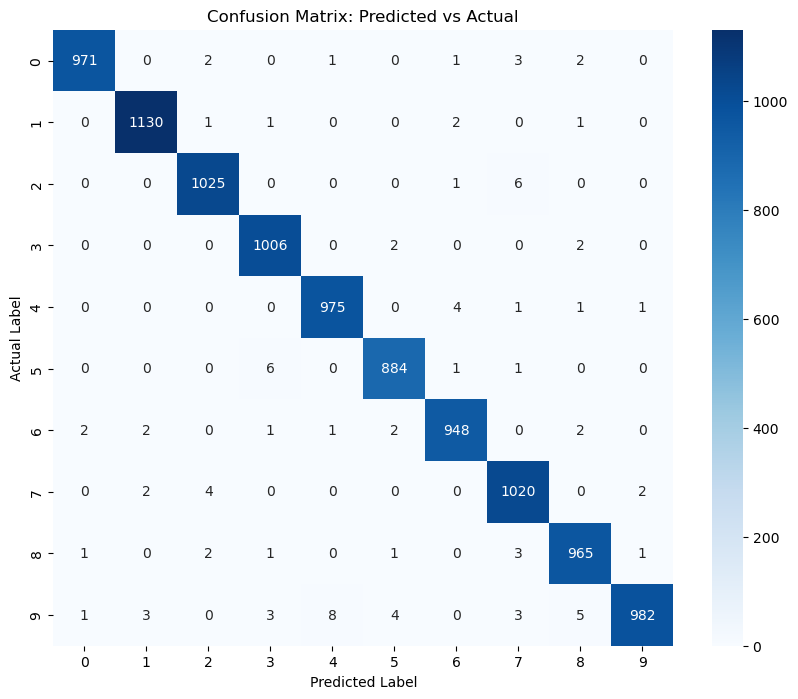

In [9]:
# Get predictions for all test images
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

# Generate Matrix
cm = confusion_matrix(y_test, pred_labels)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Predicted vs Actual')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [10]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save file to directory
with open('handwritelogic.tflite', 'wb') as f:
    f.write(tflite_model)

print("Success: handwritelogic.tflite exported.")

INFO:tensorflow:Assets written to: C:\Users\Jo\AppData\Local\Temp\tmp5qfs3a00\assets


INFO:tensorflow:Assets written to: C:\Users\Jo\AppData\Local\Temp\tmp5qfs3a00\assets


Saved artifact at 'C:\Users\Jo\AppData\Local\Temp\tmp5qfs3a00'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1435341620624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1435341621392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1435341621008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1435341622736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1435341621968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1435341623696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1435341623504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1435341622352: TensorSpec(shape=(), dtype=tf.resource, name=None)
Success: handwritelogic.tflite exported.


In [11]:
# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="handwritelogic.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test latency with 100 samples
print("Starting TFLite latency test...")
start_time = time.time()
for i in range(100):
    # Prepare the input data (ensure it is float32)
    input_data = x_test[i:i+1].astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    # Run the optimized inference
    interpreter.invoke()
    
    # Get result (optional, but ensures the operation completes)
    output_data = interpreter.get_tensor(output_details[0]['index'])

end_time = time.time()
real_avg_latency = ((end_time - start_time) / 100) * 1000

print(f"Real TFLite Latency (Optimized): {real_avg_latency:.2f} ms")
print(f"Goal Check (<50ms): {'PASSED' if real_avg_latency < 50 else 'FAILED'}")

Starting TFLite latency test...
Real TFLite Latency (Optimized): 0.07 ms
Goal Check (<50ms): PASSED


C:\Users\Jo\AppData\Roaming\Python\Python312\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
